In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")

In [2]:
df = pd.read_excel(f"../../../Data/point_data_2020/fiske_oppdret_2020_raw.xlsx", sheet_name="fiskeoppdrett_2020")
df.head()

,AAR,ORGNR,ORGNAVN,LOKNR,LOKNAVN,N_DESIMALGRADER_Y,O_DESIMALGRADER_X,KOMMUNENR,MAANED,FORTYPEID,...,FORFORBRUK_KILO,TAP_DOD,TAP_UTKAST,TAP_ROMT,TAP_ANNET,UTTAK_ANTALL,UTTAK_KILO,UTTAK_SPESIFIKASJON,TELLEFEIL,NAVN_NORSK
0,2020,939538992,LANGØYLAKS AS,10045,EIDHOLMEN,60.088083,5.120633,4625,1,1,...,36500.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laks
1,2020,939538992,LANGØYLAKS AS,10045,EIDHOLMEN,60.088083,5.120633,4625,1,1,...,20.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grønngylt
2,2020,939538992,LANGØYLAKS AS,10045,EIDHOLMEN,60.088083,5.120633,4625,1,1,...,25.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Berggylt
3,2020,939174508,Telavåg Fiskeoppdrett AS,10045,EIDHOLMEN,60.088083,5.120633,4625,1,1,...,25.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Berggylt
4,2020,939174508,Telavåg Fiskeoppdrett AS,10045,EIDHOLMEN,60.088083,5.120633,4625,1,1,...,16000.0,200.0,NaN,NaN,NaN,101642.0,413982.0,3.0,0.0,Laks


In [3]:
df["total_weight"] = df["FISKEBEHOLDNING_ANTALL"] * df["FISKEBEHOLDNING_SNITTVEKT"]
df2 = df.groupby("NAVN_NORSK").sum()["total_weight"].sort_values()
df2 = df2 / 1e6  # to tonnes
df2.index.name=''
df2 = df2[df2>0]

In [4]:
# fig = plt.figure(figsize=(10,5))
# ax = df2.plot.bar(logy=True)
# ax.set_ylabel('Total weight (tonnes)')
# #ax.set_title('Aquaculture 2020')
# #plt.savefig('aquaculture_prod_by_species_2020', dpi=200, bbox_inches='tight')

In [5]:
df3 = df.groupby("NAVN_NORSK").sum()["UTTAK_KILO"].sort_values()
df3 = df3 / 1e3  # to tonnes
df3.index.name=''
df3 = df3[df3>0]

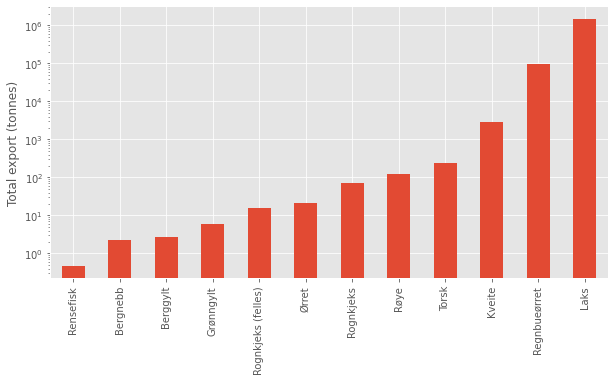

In [6]:
fig = plt.figure(figsize=(10,5))
ax = df3.plot.bar(logy=True)
ax.set_ylabel('Total export (tonnes)')
plt.savefig('aquaculture_prod_by_species_2020.png', dpi=200, bbox_inches='tight')

In [13]:
spec = ['Regnbueørret',
       'Laks']
inc = df3[df3.index.isin(spec)].sum()
notinc = df3[~df3.index.isin(spec)].sum()
print(inc)
print(notinc)
print(100*notinc/(inc+notinc))
print(100*notinc/(df3.sum()))

1597215.166
3302.295
0.20632670873435727
0.20632670873435727
